In [22]:
import matplotlib.pyplot as plt
from osgeo import gdal
import rasterio
import osgeo.osr as osr

data = gdal.Open('../dataset/soil_moisture.tif')

In [23]:
width = data.RasterXSize
height = data.RasterYSize
layers = data.RasterCount

print("Raster size: {} x {}".format(width, height))
print("Layers: ", layers)

Raster size: 777 x 505
Layers:  1


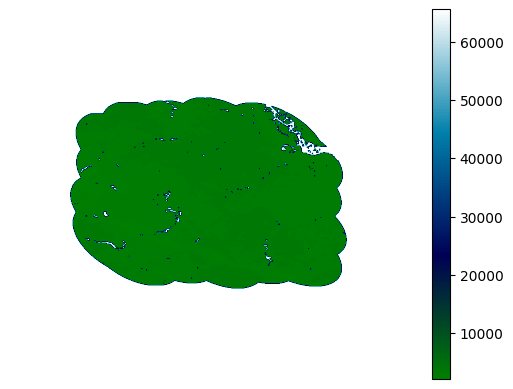

In [24]:
image = data.ReadAsArray()

plt.imshow(image,cmap='ocean')
plt.colorbar()
plt.axis('off')
plt.show()

In [25]:
metadata = data.GetMetadata()

print("Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

Metadata:
AREA_OR_POINT: Area


In [29]:
gdal.Warp('../dataset/soil_moisture.tif', data, cutlineDSName='../dataset/polygon.geojson', cropToCutline=True)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001FC700B3210> >

In [30]:

gdal.Translate('../dataset/jpeg_soil_moisture.jpg', '../dataset/soil_moisture.tif', format='JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001FC700B2010> >

In [32]:
dataset = gdal.Open('../dataset/jpeg_soil_moisture.jpg')

geotransform = dataset.GetGeoTransform()

pixel1_row = 50 
pixel1_col = 100  
pixel2_row = 150  
pixel2_col = 200

x1 = geotransform[0] + pixel1_col * geotransform[1] + pixel1_row * geotransform[2]
y1 = geotransform[3] + pixel1_col * geotransform[4] + pixel1_row * geotransform[5]
x2 = geotransform[0] + pixel2_col * geotransform[1] + pixel2_row * geotransform[2]
y2 = geotransform[3] + pixel2_col * geotransform[4] + pixel2_row * geotransform[5]

src_srs = osr.SpatialReference()
src_srs.ImportFromWkt(dataset.GetProjection())

tgt_srs = osr.SpatialReference()
tgt_srs.ImportFromEPSG(3857)

ct = osr.CoordinateTransformation(src_srs, tgt_srs)

x1, y1, _ = ct.TransformPoint(x1, y1)
x2, y2, _ = ct.TransformPoint(x2, y2)

print("Pixel 1 (row={}, col={}): EPSG:3857 (x={}, y={})".format(pixel1_row, pixel1_col, x1, y1))
print("Pixel 2 (row={}, col={}): EPSG:3857 (x={}, y={})".format(pixel2_row, pixel2_col, x2, y2))

dataset = None

Pixel 1 (row=50, col=100): EPSG:3857 (x=5577942.048610759, y=3530353.026150834)
Pixel 2 (row=150, col=200): EPSG:3857 (x=5554750.491739477, y=3557217.338726144)
